In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#### df 경로
df = pd.read_csv('./../data/df.csv')

In [2]:
import time
from transformers import pipeline
import pandas as pd
import requests
from selenium import webdriver
import bs4

driver = webdriver.Chrome('/Users/junho/Downloads/chromedriver')
url = 'https://www.federalreserve.gov/newsevents/testimony.htm'
driver.get(url)
driver.implicitly_wait(2)
driver.set_window_size(2560, 1440)
driver.implicitly_wait(2)
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[2]/div/div[1]/input').click()
driver.implicitly_wait(2)
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[2]/div/div[1]/input').clear()
driver.implicitly_wait(2)
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[2]/div/div[1]/input').send_keys(
    '07/01/2010')
driver.implicitly_wait(2)

# submit
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[5]/a/span').click()
driver.implicitly_wait(2)
writing_list = []
bs_obj = bs4.BeautifulSoup(driver.page_source)
'''
time_tags = bs_obj.find_all('time', {'class': 'itemDate ng-binding'})
time_data = [i.text for i in time_tags]
time_data
'''
time_data = []
root_path = 'https://www.federalreserve.gov'
time.sleep(2)
cnt = 0
for i in range(7):
    bs_obj = bs4.BeautifulSoup(driver.page_source)
    target = bs_obj.find('div', {'id': 'article'})
    atags = target.find_all('a')
    time_tags = bs_obj.find_all('time', {'class': 'itemDate ng-binding'})
    for j in time_tags:
        if j.text == '9/25/2019':
            cnt += 1
            if cnt == 2:
                time_data.append(j.text)
        else:
            time_data.append(j.text)
    for a in atags:
        if 'item.title' in str(a):
            try:
                url = ''
                url = root_path + a['href']
                res = requests.get(url)
                bs_obj = bs4.BeautifulSoup(res.text)
                data = bs_obj.find('div',{'class':'col-xs-12 col-sm-8 col-md-8'})
                it = data.find_all('p') # []
                all = ''
                for dialogue in it:
                    #if 'fn1' in str(dialogue):
                    #    break
                    all += dialogue.text
                writing_list.append(all.replace('\n',' ').replace('\t',' ').replace('\r',' '))
                print(url)
            except:
                pass
    print(f'page{i+1}')
    time.sleep(4)
    driver.find_element_by_xpath('//*[@id="article"]/ul[1]/li[9]/a').click()
    time.sleep(1)

len(writing_list)
len(time_data)
df = pd.DataFrame()
df['date'] = time_data
df['target'] = writing_list

https://www.federalreserve.gov/newsevents/testimony/powell20220302a.htm
https://www.federalreserve.gov/newsevents/testimony/brainard20220113a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20220111a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20211130a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210928a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210714a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210622a.htm
https://www.federalreserve.gov/newsevents/testimony/quarles20210519a.htm
https://www.federalreserve.gov/newsevents/testimony/vanderweide20210415a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210323a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210223a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20201201a.htm
https://www.federalreserve.gov/newsevents/testimony/quarles20201110a.htm
https://www.federalreserve.gov/newsevents/testimony/pow

ConnectionResetError: [Errno 54] Connection reset by peer

In [3]:
testimony = pd.read_csv('/Users/junho/Downloads/testimony2010-2022_without_nomination_hearing.csv')
date = testimony['date']
testimony_ = testimony['target']

In [4]:
qa = pipeline("question-answering")
sentiment = pipeline("sentiment-analysis")
data = []
for i in range(len(testimony_)):
    a = qa(question = 'Can you achieve economic growth?', context = testimony_[i])
    senti = sentiment(a.get('answer'))
    print(a)
    print(senti)
    print(date[i])
    data.append(senti[0].values())


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)
2022-04-19 14:12:44.865279: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
All model checkpoint layers were used when initializing TFDistilBertForQuestionAnswering.

All the layers of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at distilbert-base-cased-distilled-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDi

{'score': 0.043098922818899155, 'start': 5845, 'end': 5889, 'answer': 'maximum-employment and price-stability goals'}
[{'label': 'POSITIVE', 'score': 0.9939809441566467}]
2022-03-02
{'score': 0.28258368372917175, 'start': 2751, 'end': 2851, 'answer': 'We are strongly committed to achieving our statutory goals of maximum employment and price stability'}
[{'label': 'POSITIVE', 'score': 0.999062716960907}]
2022-01-11
{'score': 0.04576058313250542, 'start': 254, 'end': 293, 'answer': 'The economy has continued to strengthen'}
[{'label': 'POSITIVE', 'score': 0.9995342493057251}]
2021-11-30
{'score': 0.32122305035591125, 'start': 707, 'end': 781, 'answer': 'growth is widely expected to continue at a strong pace in the second half.'}
[{'label': 'POSITIVE', 'score': 0.9994558691978455}]
2021-09-28
{'score': 0.3648337125778198, 'start': 1218, 'end': 1244, 'answer': 'increasing at a solid pace'}
[{'label': 'POSITIVE', 'score': 0.9998701810836792}]
2021-07-14
{'score': 0.11082787066698074, 'start

{'score': 0.19794698059558868, 'start': 5294, 'end': 5343, 'answer': 'economic growth could also exceed our projections'}
[{'label': 'POSITIVE', 'score': 0.9983929991722107}]
2016-02-10
{'score': 0.30782654881477356, 'start': 1586, 'end': 1678, 'answer': 'Many economic forecasters expect growth roughly along those same lines in the fourth quarter'}
[{'label': 'NEGATIVE', 'score': 0.9823144674301147}]
2015-12-03
{'score': 0.4855736792087555, 'start': 22282, 'end': 22307, 'answer': 'Loan growth is picking up'}
[{'label': 'POSITIVE', 'score': 0.9965272545814514}]
2015-11-04
{'score': 0.17827190458774567, 'start': 1651, 'end': 1719, 'answer': 'the Federal Reserve moved quickly to develop a supervisory framework'}
[{'label': 'NEGATIVE', 'score': 0.8568278551101685}]
2015-09-29
{'score': 0.1881110966205597, 'start': 2824, 'end': 2851, 'answer': 'moderate pace of GDP growth'}
[{'label': 'POSITIVE', 'score': 0.9969221949577332}]
2015-07-15
{'score': 0.04192998260259628, 'start': 1777, 'end': 1

{'score': 0.012940272688865662, 'start': 1392, 'end': 1451, 'answer': 'potential to expand access to mainstream financial services'}
[{'label': 'POSITIVE', 'score': 0.9993533492088318}]
2012-03-29
{'score': 0.23626865446567535, 'start': 8403, 'end': 8451, 'answer': 'The situation in Europe is continuously evolving'}
[{'label': 'POSITIVE', 'score': 0.9865124225616455}]
2012-03-27
{'score': 0.037058647722005844, 'start': 7254, 'end': 7304, 'answer': 'Work on the NSFR is on a considerably slower track'}
[{'label': 'NEGATIVE', 'score': 0.9996755123138428}]
2012-03-22
{'score': 0.19557048380374908, 'start': 3993, 'end': 4038, 'answer': 'continued efforts to increase economic growth'}
[{'label': 'POSITIVE', 'score': 0.9995237588882446}]
2012-03-21
{'score': 0.027262313291430473, 'start': 1879, 'end': 1949, 'answer': 'a process for the receipt and review of borrower claims and complaints'}
[{'label': 'NEGATIVE', 'score': 0.6213454008102417}]
2012-03-19
{'score': 0.06008530035614967, 'start': 

{'score': 0.05900746211409569, 'start': 4740, 'end': 4763, 'answer': 'stalled economic growth'}
[{'label': 'NEGATIVE', 'score': 0.9954609274864197}]
2010-09-01
{'score': 0.05965038016438484, 'start': 410, 'end': 423, 'answer': 'moderate pace'}
[{'label': 'POSITIVE', 'score': 0.998223602771759}]
2010-07-21
{'score': 0.21968618035316467, 'start': 1793, 'end': 1854, 'answer': 'financial stresses can quickly spread across national borders'}
[{'label': 'NEGATIVE', 'score': 0.9170272946357727}]
2010-07-20


In [5]:
score1 = []
for i in data:
    if list(i)[0] == 'NEGATIVE':
        score1.append(-list(i)[1])
    else:
        score1.append(list(i)[1])


In [6]:
score_df = pd.DataFrame()
score_df['Q1'] = score1

score_df['date'] = date
score_df['date'] = pd.to_datetime(score_df['date'],format='%Y-%m-%d')

score_df['year'] = score_df['date'].dt.year
score_df['quarter'] = score_df['date'].dt.quarter
score_df = score_df.groupby(by=[score_df['year'],score_df['quarter']]).mean()
score_df.to_csv('/Users/junho/Downloads/testimony1.csv')
score_df

Q1
year quarter          
2010 3        0.014537
     4        0.006298
2011 1       -0.462258
     2        0.797096
     3        0.345389
     4        0.479481
2012 1        0.270508
     2        0.662740
     3        0.932809
     4        0.998409
2013 1        0.321590
     2        0.599296
     3        0.015978
     4        0.999745
2014 1        0.930044
     2        0.998851
     3        0.432019
     4        0.008891
2015 1       -0.325451
     2        0.071191
     3        0.070047
     4        0.007106
2016 1        0.998393
     2        0.002068
     3        0.997880
     4       -0.640552
2017 1        0.999466
     2        0.999670
     3        0.998908
     4        0.997013
2018 1        0.999529
     2        0.999425
     3        0.879740
     4        0.996489
2019 1        0.998110
     2        0.998962
     3       -0.332461
     4        0.319638
2020 1        0.999031
     2        0.597694
     3       -0.278174
     4       -0.160328
2021 1        0.002008
     2        0.333228
     3        0.999663
     4        0.999534
2022 1        0.996522

<AxesSubplot:xlabel='year,quarter'>

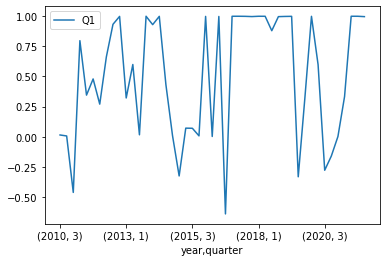

In [7]:
score_df.plot()

# 비정형 데이터 평균값 그래프

In [2]:
df = pd.read_csv('/Users/parkjubro/Desktop/semi_proj/sample1.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/parkjubro/Desktop/semi_proj/sample1.csv'

In [18]:
# 각 컬럼을 섹션으로 나눠 평균 계산 
def averaging(column):
    section1 = []
    section2 = []
    section3 = []
    for i in range(len(df)):
        if i <= 24:
            section1.append(df[column][i])
        elif i <= 37:
            section2.append(df[column][i])
        else:
            section3.append(df[column][i])
    df[column][:25] = np.mean(section1)
    df[column][25:38] = np.mean(section2)
    df[column][38:] = np.mean(section3)
    return df

averaging('testimony')
averaging('minutes')
averaging('beige')
averaging('speech1')
averaging('speech2')

/var/folders/qs/yvcwxy5j79g7gxngttx5yb5w0000gn/T/ipykernel_43061/1371610036.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][:25] = np.mean(section1)
/var/folders/qs/yvcwxy5j79g7gxngttx5yb5w0000gn/T/ipykernel_43061/1371610036.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][25:38] = np.mean(section2)
/var/folders/qs/yvcwxy5j79g7gxngttx5yb5w0000gn/T/ipykernel_43061/1371610036.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,Unnamed: 0,year,quarter,testimony,minutes,beige,speech1,speech2,btc,inf,uem,label,FEDfunds
0,0,2010,4,0.380703,0.438238,0.204732,0.379057,0.063223,109.861229,1.22978,9.500000,0.0,0.186667
1,1,2011,1,0.380703,0.438238,0.204732,0.379057,0.063223,98.082925,2.14822,9.033333,0.0,0.156667
2,2,2011,2,0.380703,0.438238,0.204732,0.379057,0.063223,300.196282,3.34611,9.066667,0.0,0.093333
3,3,2011,3,0.380703,0.438238,0.204732,0.379057,0.063223,-114.957873,3.71595,9.000000,0.0,0.083333
4,4,2011,4,0.380703,0.438238,0.204732,0.379057,0.063223,-8.167803,3.34473,8.633333,0.0,0.073333
5,5,2012,1,0.380703,0.438238,0.204732,0.379057,0.063223,4.167270,2.82932,8.266667,1.0,0.103333
6,6,2012,2,0.380703,0.438238,0.204732,0.379057,0.063223,31.287232,1.88792,8.200000,1.0,0.153333
7,7,2012,3,0.380703,0.438238,0.204732,0.379057,0.063223,61.558895,1.68486,8.033333,0.0,0.143333
8,8,2012,4,0.380703,0.438238,0.204732,0.379057,0.063223,8.499321,1.90357,7.800000,0.0,0.160000
9,9,2013,1,0.380703,0.438238,0.204732,0.379057,0.063223,192.990981,1.74020,7.733333,0.0,0.143333


<AxesSubplot:>

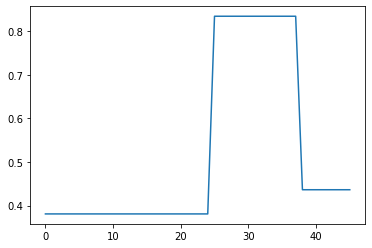

In [19]:
df['testimony'].plot()

<AxesSubplot:>

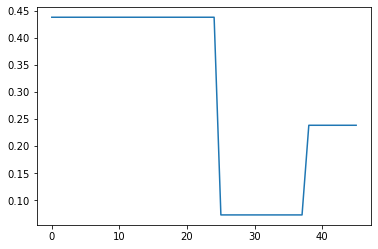

In [20]:
df['minutes'].plot()

<AxesSubplot:>

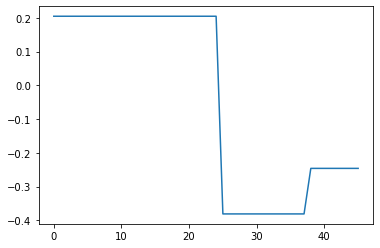

In [21]:
df['beige'].plot()

<AxesSubplot:>

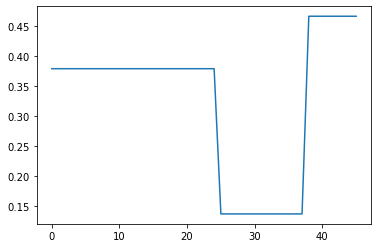

In [22]:
df['speech1'].plot()

<AxesSubplot:>

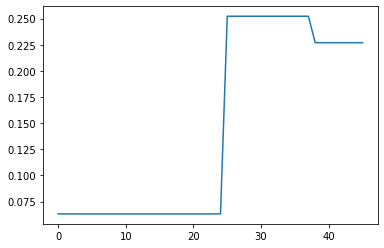

In [23]:
df['speech2'].plot()

In [8]:
score_df = score_df.reset_index()
score_df

,year,quarter,Q1
0,2010,3,0.014537
1,2010,4,0.006298
2,2011,1,-0.462258
3,2011,2,0.797096
4,2011,3,0.345389
5,2011,4,0.479481
6,2012,1,0.270508
7,2012,2,0.662740
8,2012,3,0.932809
9,2012,4,0.998409


In [9]:
interest = pd.read_csv('/Users/junho/Downloads/FEDFUNDS.csv')
interest['DATE'] = pd.to_datetime(interest['DATE'],format='%Y-%m-%d')
interest

interest['year'] = interest['DATE'].dt.year
interest['quarter'] = interest['DATE'].dt.quarter
interest = interest.groupby(by=[interest['year'],interest['quarter']]).mean('FEDFUNDS')
interest = interest.reset_index()
interest

,year,quarter,FEDFUNDS
0,2010,3,0.186667
1,2010,4,0.186667
2,2011,1,0.156667
3,2011,2,0.093333
4,2011,3,0.083333
5,2011,4,0.073333
6,2012,1,0.103333
7,2012,2,0.153333
8,2012,3,0.143333
9,2012,4,0.160000


In [10]:
score_df = pd.read_csv('/Users/junho/Desktop/data/project_interest/data/df.csv')
score_df.loc[:21,'btc'] = 0
score_df['FEDfunds'] = interest['FEDFUNDS']
score_df

,Unnamed: 0,year,quarter,testimony,minutes,beige,speech1,speech2,btc,inf,uem,label,FEDfunds
0,1,2010,4,0.006298,0.999464,0.962157,0.214615,0.016168,0.000000,1.22978,9.500000,0.0,0.186667
1,2,2011,1,-0.462258,0.994393,0.998924,0.142740,0.138890,0.000000,2.14822,9.033333,0.0,0.186667
2,3,2011,2,0.797096,0.998627,0.027240,0.606771,0.370122,0.000000,3.34611,9.066667,0.0,0.156667
3,4,2011,3,0.345389,-0.999317,-0.999372,0.460445,0.175324,0.000000,3.71595,9.000000,0.0,0.093333
4,5,2011,4,0.479481,0.994647,0.995748,0.001555,-0.186537,0.000000,3.34473,8.633333,0.0,0.083333
5,6,2012,1,0.270508,0.998202,0.019599,0.796364,0.395139,0.000000,2.82932,8.266667,1.0,0.073333
6,7,2012,2,0.662740,0.999127,0.999800,0.193265,-0.008554,0.000000,1.88792,8.200000,1.0,0.103333
7,8,2012,3,0.932809,0.000188,-0.997239,0.669289,0.356781,0.000000,1.68486,8.033333,0.0,0.153333
8,9,2012,4,0.998409,-0.999350,0.150898,0.354380,0.024408,0.000000,1.90357,7.800000,0.0,0.143333
9,10,2013,1,0.321590,0.000007,0.000078,0.438148,-0.254101,0.000000,1.74020,7.733333,0.0,0.160000


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
quad = PolynomialFeatures(degree=2) # ,include_bias=False
input_idx = 44

features = ['testimony','speech1','inf','uem']
X = score_df.loc[:input_idx,features]
y = score_df.loc[:input_idx,'FEDfunds']
X_quad = quad.fit_transform(X)
lr.fit(X_quad,y)
y_quad_fit = lr.predict(quad.fit_transform(X))

pred = []
for i in y_quad_fit:
    if i < 0:
        pred.append(0)
    else:
        pred.append(i)

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred,y)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(pred,y)) # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음

0.254873964254407
0.8513401410870701


In [67]:
lr.predict(quad.fit_transform(np.array(score_df.loc[45,features]).reshape(1,-1)))


array([-1.21497757])

In [68]:
temp_score_df = score_df.loc[:input_idx,:]
temp_score_df['pred'] = pred


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_26158/3571552644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_score_df['pred'] = pred


Text(0.5, 1.0, 'no question')

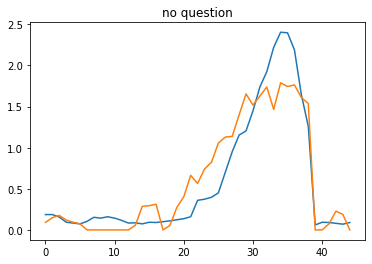

In [49]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['FEDfunds'])
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title('no question')



Text(0.5, 1.0, 'mixed')

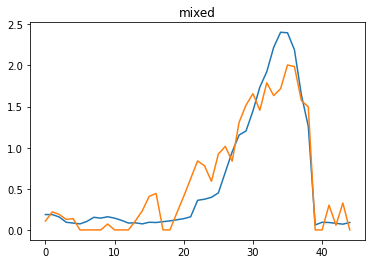

In [69]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['FEDfunds'])
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title('mixed')

Text(0.5, 1.0, 'question')

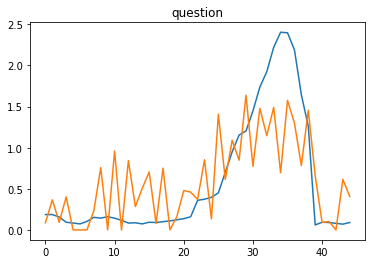

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['FEDfunds'])
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title('question')

# 다양한 분류를 사용하여 평가한 결과

In [3]:
# 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
    
    return [accuracy, precision, recall, F1, AUC]

train = df[['testimony','minutes','beige','speech1','speech2']].to_numpy()
label = df['label'].to_numpy()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 10)

dt_clf = DecisionTreeClassifier(random_state = 10)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

dt = get_clf_eval(y_test, pred)

lr_clf = LogisticRegression(random_state = 10)
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting = 'soft')
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 10)

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
vo = get_clf_eval(y_test, pred)

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
lr = get_clf_eval(y_test, pred)

knn_clf.fit(x_train, y_train)
pred = knn_clf.predict(x_test)
knn = get_clf_eval(y_test, pred)

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
rf = get_clf_eval(y_test, pred)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)
pred = gbrt.predict(x_test)

gb = get_clf_eval(y_test, pred)

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(x_train, y_train)
pred = xgb_wrapper.predict(x_test)

xgb = get_clf_eval(y_test, pred)


정확도: 0.4000
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.2857

정확도: 0.7000
정밀도: 0.5000
재현율: 0.6667
F1: 0.5714
AUC: 0.6905

정확도: 0.6000
정밀도: 0.4000
재현율: 0.6667
F1: 0.5000
AUC: 0.6190

정확도: 0.6000
정밀도: 0.3333
재현율: 0.3333
F1: 0.3333
AUC: 0.5238

정확도: 0.5000
정밀도: 0.2500
재현율: 0.3333
F1: 0.2857
AUC: 0.4524

정확도: 0.6000
정밀도: 0.4000
재현율: 0.6667
F1: 0.5000
AUC: 0.6190
[21:54:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

정확도: 0.5000
정밀도: 0.2500
재현율: 0.3333
F1: 0.2857
AUC: 0.4524


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [9]:
unstruct = pd.DataFrame({'DecisionTree':dt, 'Voting': vo, 'Logistic':lr, 'KNN':knn, 'RandomForest':rf,'GradientBoost':gb, 'XGB':xgb}, index=[['비정형','비정형','비정형','비정형','비정형'],['정확도', '정밀도', '재현율', 'F1', 'AUC']])
unstruct

DecisionTree    Voting  Logistic       KNN  RandomForest  \
비정형 정확도      0.400000  0.700000  0.600000  0.600000      0.500000   
    정밀도      0.000000  0.500000  0.400000  0.333333      0.250000   
    재현율      0.000000  0.666667  0.666667  0.333333      0.333333   
    F1       0.000000  0.571429  0.500000  0.333333      0.285714   
    AUC      0.285714  0.690476  0.619048  0.523810      0.452381   

         GradientBoost       XGB  
비정형 정확도       0.600000  0.500000  
    정밀도       0.400000  0.250000  
    재현율       0.666667  0.333333  
    F1        0.500000  0.285714  
    AUC       0.619048  0.452381

In [10]:
train = df[['inf','uem']].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 10)

dt_clf = DecisionTreeClassifier(random_state = 10)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
dt = get_clf_eval(y_test, pred)

lr_clf = LogisticRegression(random_state = 10)
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting = 'soft')

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)

vo = get_clf_eval(y_test, pred)

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

lr = get_clf_eval(y_test, pred)

knn_clf.fit(x_train, y_train)
pred = knn_clf.predict(x_test)

knn = get_clf_eval(y_test, pred)

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

rf = get_clf_eval(y_test, pred)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)
pred = gbrt.predict(x_test)

gb = get_clf_eval(y_test, pred)

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(x_train, y_train)
pred = xgb_wrapper.predict(x_test)

xgb = get_clf_eval(y_test, pred)


정확도: 0.7000
정밀도: 0.5000
재현율: 0.6667
F1: 0.5714
AUC: 0.6905

정확도: 0.8000
정밀도: 0.6000
재현율: 1.0000
F1: 0.7500
AUC: 0.8571

정확도: 0.8000
정밀도: 0.6000
재현율: 1.0000
F1: 0.7500
AUC: 0.8571

정확도: 0.7000
정밀도: 0.5000
재현율: 0.6667
F1: 0.5714
AUC: 0.6905

정확도: 0.9000
정밀도: 1.0000
재현율: 0.6667
F1: 0.8000
AUC: 0.8333

정확도: 0.7000
정밀도: 0.5000
재현율: 0.6667
F1: 0.5714
AUC: 0.6905
[21:55:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

정확도: 0.6000
정밀도: 0.4000
재현율: 0.6667
F1: 0.5000
AUC: 0.6190


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [11]:
struct = pd.DataFrame({'DecisionTree':dt, 'Voting': vo, 'Logistic':lr, 'KNN':knn, 'RandomForest':rf,'GradientBoost':gb, 'XGB':xgb}, index=[['정형','정형','정형','정형','정형'],['정확도', '정밀도', '재현율', 'F1', 'AUC']])
struct

DecisionTree    Voting  Logistic       KNN  RandomForest  \
정형 정확도      0.700000  0.800000  0.800000  0.700000      0.900000   
   정밀도      0.500000  0.600000  0.600000  0.500000      1.000000   
   재현율      0.666667  1.000000  1.000000  0.666667      0.666667   
   F1       0.571429  0.750000  0.750000  0.571429      0.800000   
   AUC      0.690476  0.857143  0.857143  0.690476      0.833333   

        GradientBoost       XGB  
정형 정확도       0.700000  0.600000  
   정밀도       0.500000  0.400000  
   재현율       0.666667  0.666667  
   F1        0.571429  0.500000  
   AUC       0.690476  0.619048

In [12]:
train = df[['testimony','minutes','beige','speech1','speech2', 'inf','uem']].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 10)

dt_clf = DecisionTreeClassifier(random_state = 10)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
dt = get_clf_eval(y_test, pred)

lr_clf = LogisticRegression(random_state = 10)
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting = 'soft')

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)

vo = get_clf_eval(y_test, pred)

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

lr = get_clf_eval(y_test, pred)

knn_clf.fit(x_train, y_train)
pred = knn_clf.predict(x_test)

knn = get_clf_eval(y_test, pred)

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

rf = get_clf_eval(y_test, pred)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)
pred = gbrt.predict(x_test)

gb = get_clf_eval(y_test, pred)

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(x_train, y_train)
pred = xgb_wrapper.predict(x_test)

xgb = get_clf_eval(y_test, pred)


정확도: 0.8000
정밀도: 1.0000
재현율: 0.3333
F1: 0.5000
AUC: 0.6667

정확도: 0.8000
정밀도: 0.6000
재현율: 1.0000
F1: 0.7500
AUC: 0.8571

정확도: 0.8000
정밀도: 0.6000
재현율: 1.0000
F1: 0.7500
AUC: 0.8571

정확도: 0.7000
정밀도: 0.5000
재현율: 0.6667
F1: 0.5714
AUC: 0.6905

정확도: 0.7000
정밀도: 0.5000
재현율: 0.6667
F1: 0.5714
AUC: 0.6905

정확도: 0.9000
정밀도: 1.0000
재현율: 0.6667
F1: 0.8000
AUC: 0.8333
[21:55:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

정확도: 0.7000
정밀도: 0.5000
재현율: 0.6667
F1: 0.5714
AUC: 0.6905


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [13]:
multistruct = pd.DataFrame({'DecisionTree':dt, 'Voting': vo, 'Logistic':lr, 'KNN':knn, 'RandomForest':rf,'GradientBoost':gb, 'XGB':xgb}, index=[['정형 + 비정형','정형 + 비정형','정형 + 비정형','정형 + 비정형','정형 + 비정형'],['정확도', '정밀도', '재현율', 'F1', 'AUC']])
multistruct

DecisionTree    Voting  Logistic       KNN  RandomForest  \
정형 + 비정형 정확도      0.800000  0.800000  0.800000  0.700000      0.700000   
         정밀도      1.000000  0.600000  0.600000  0.500000      0.500000   
         재현율      0.333333  1.000000  1.000000  0.666667      0.666667   
         F1       0.500000  0.750000  0.750000  0.571429      0.571429   
         AUC      0.666667  0.857143  0.857143  0.690476      0.690476   

              GradientBoost       XGB  
정형 + 비정형 정확도       0.900000  0.700000  
         정밀도       1.000000  0.500000  
         재현율       0.666667  0.666667  
         F1        0.800000  0.571429  
         AUC       0.833333  0.690476

In [14]:
result = pd.concat([unstruct,struct,multistruct])
result

DecisionTree    Voting  Logistic       KNN  RandomForest  \
비정형      정확도      0.400000  0.700000  0.600000  0.600000      0.500000   
         정밀도      0.000000  0.500000  0.400000  0.333333      0.250000   
         재현율      0.000000  0.666667  0.666667  0.333333      0.333333   
         F1       0.000000  0.571429  0.500000  0.333333      0.285714   
         AUC      0.285714  0.690476  0.619048  0.523810      0.452381   
정형       정확도      0.700000  0.800000  0.800000  0.700000      0.900000   
         정밀도      0.500000  0.600000  0.600000  0.500000      1.000000   
         재현율      0.666667  1.000000  1.000000  0.666667      0.666667   
         F1       0.571429  0.750000  0.750000  0.571429      0.800000   
         AUC      0.690476  0.857143  0.857143  0.690476      0.833333   
정형 + 비정형 정확도      0.800000  0.800000  0.800000  0.700000      0.700000   
         정밀도      1.000000  0.600000  0.600000  0.500000      0.500000   
         재현율      0.333333  1.000000  1.000000  0.666667      0.666667   
         F1       0.500000  0.750000  0.750000  0.571429      0.571429   
         AUC      0.666667  0.857143  0.857143  0.690476      0.690476   

              GradientBoost       XGB  
비정형      정확도       0.600000  0.500000  
         정밀도       0.400000  0.250000  
         재현율       0.666667  0.333333  
         F1        0.500000  0.285714  
         AUC       0.619048  0.452381  
정형       정확도       0.700000  0.600000  
         정밀도       0.500000  0.400000  
         재현율       0.666667  0.666667  
         F1        0.571429  0.500000  
         AUC       0.690476  0.619048  
정형 + 비정형 정확도       0.900000  0.700000  
         정밀도       1.000000  0.500000  
         재현율       0.666667  0.666667  
         F1        0.800000  0.571429  
         AUC       0.833333  0.690476